In [1]:
import numpy as np # NumPy
import matplotlib.pylab as plt # Matplotlib plots
import matplotlib.patches as mpatches
import pandas as pd # Pandas
# import uproot
import pickle
import logging
import pprint

import os # read directories etc.
from scipy.optimize import curve_fit
import pylandau  # Landau Gaussian convolution

from LoadBatch import *
from SensorClasses import *

verbose = False


### All the steps of the analysis put together and logically sequenced

In [2]:
### set logs level
logging.basicConfig(level=logging.WARNING, format='[%(levelname)s] -\t %(message)s')

## Generic bins options, Batches import
the Batch objects are created by "logbook reader", it reads the .csv containing all the information about the batches (temperature, runs, angles, sensors etc.). Next I put all of the Batches into a dictionary for easier access

In [3]:
PIXEL_SIZE = 0.0185 #mm

### choose the bins so that they match the MIMOSA pixels (which are just the coordinates)
large_bins = (np.arange(0, 900,1),
              np.arange(0, 900,1))

bins1 = (np.arange(450, 700, 1),
        np.arange(200, 500, 1))

bins2 = (np.arange(500, 650, 1),
              np.arange(200, 450, 1))

### Load the dictionary of sensor names and runs
dict_of_batches = read_pickle("dict_of_batches.pickle")

logging.info(f"dictionary of the batches: \n{dict_of_batches}")

## Plot a single batch

In [4]:
### show all information about the batch
this_batch = 401
print(dict_of_batches[this_batch].__dict__,'\n')

### show all informations about each sensor
for S in ['S1','S2']:
    for ch, sensor in dict_of_batches[this_batch].S[S].channels.items():
        print(f"{S}, {ch}:", sensor.__dict__)

{'batch_number': 401, 'angle': 0.0, 'runs': [9620, 9621, 9622, 9624, 9625, 9627, 9628, 9629, 9630], 'tempA': -30.555555555555557, 'tempB': -30.555555555555557, 'S': {'S1': <SensorClasses.Oscilloscope object at 0x7f6e06699900>, 'S2': <SensorClasses.Oscilloscope object at 0x7f6e06699ba0>}} 

S1, Ch1: {'name': 'MCP', 'board': ' ', 'dut_position': 5.0, 'fluence': 0, 'transimpedance': 4700, 'voltage': 2500}
S1, Ch2: {'name': 'USTC2.1-W17-P6-A', 'board': 'CERN-3', 'dut_position': 3.0, 'fluence': 0, 'transimpedance': 10700, 'voltage': -80}
S1, Ch3: {'name': 'USTC2.1-W17-P6-A', 'board': 'CERN-3', 'dut_position': 3.0, 'fluence': 0, 'transimpedance': 10700, 'voltage': -80}
S1, Ch4: {'name': 'IMEv3-W12-C3-1-4', 'board': 'CERN-1', 'dut_position': 1, 'fluence': 0, 'transimpedance': 10700, 'voltage': -80}
S2, Ch1: {'name': 'MCP', 'board': ' ', 'dut_position': 5.0, 'fluence': 0, 'transimpedance': 4700, 'voltage': 2500}
S2, Ch2: {'name': 'CNM-R15973-W5-D138', 'board': 'JSI-B14', 'dut_position': 4, 'fl

Batch:  401
S1
MCP: 2500 V, angle: 0.0° temperature:-30.56°C


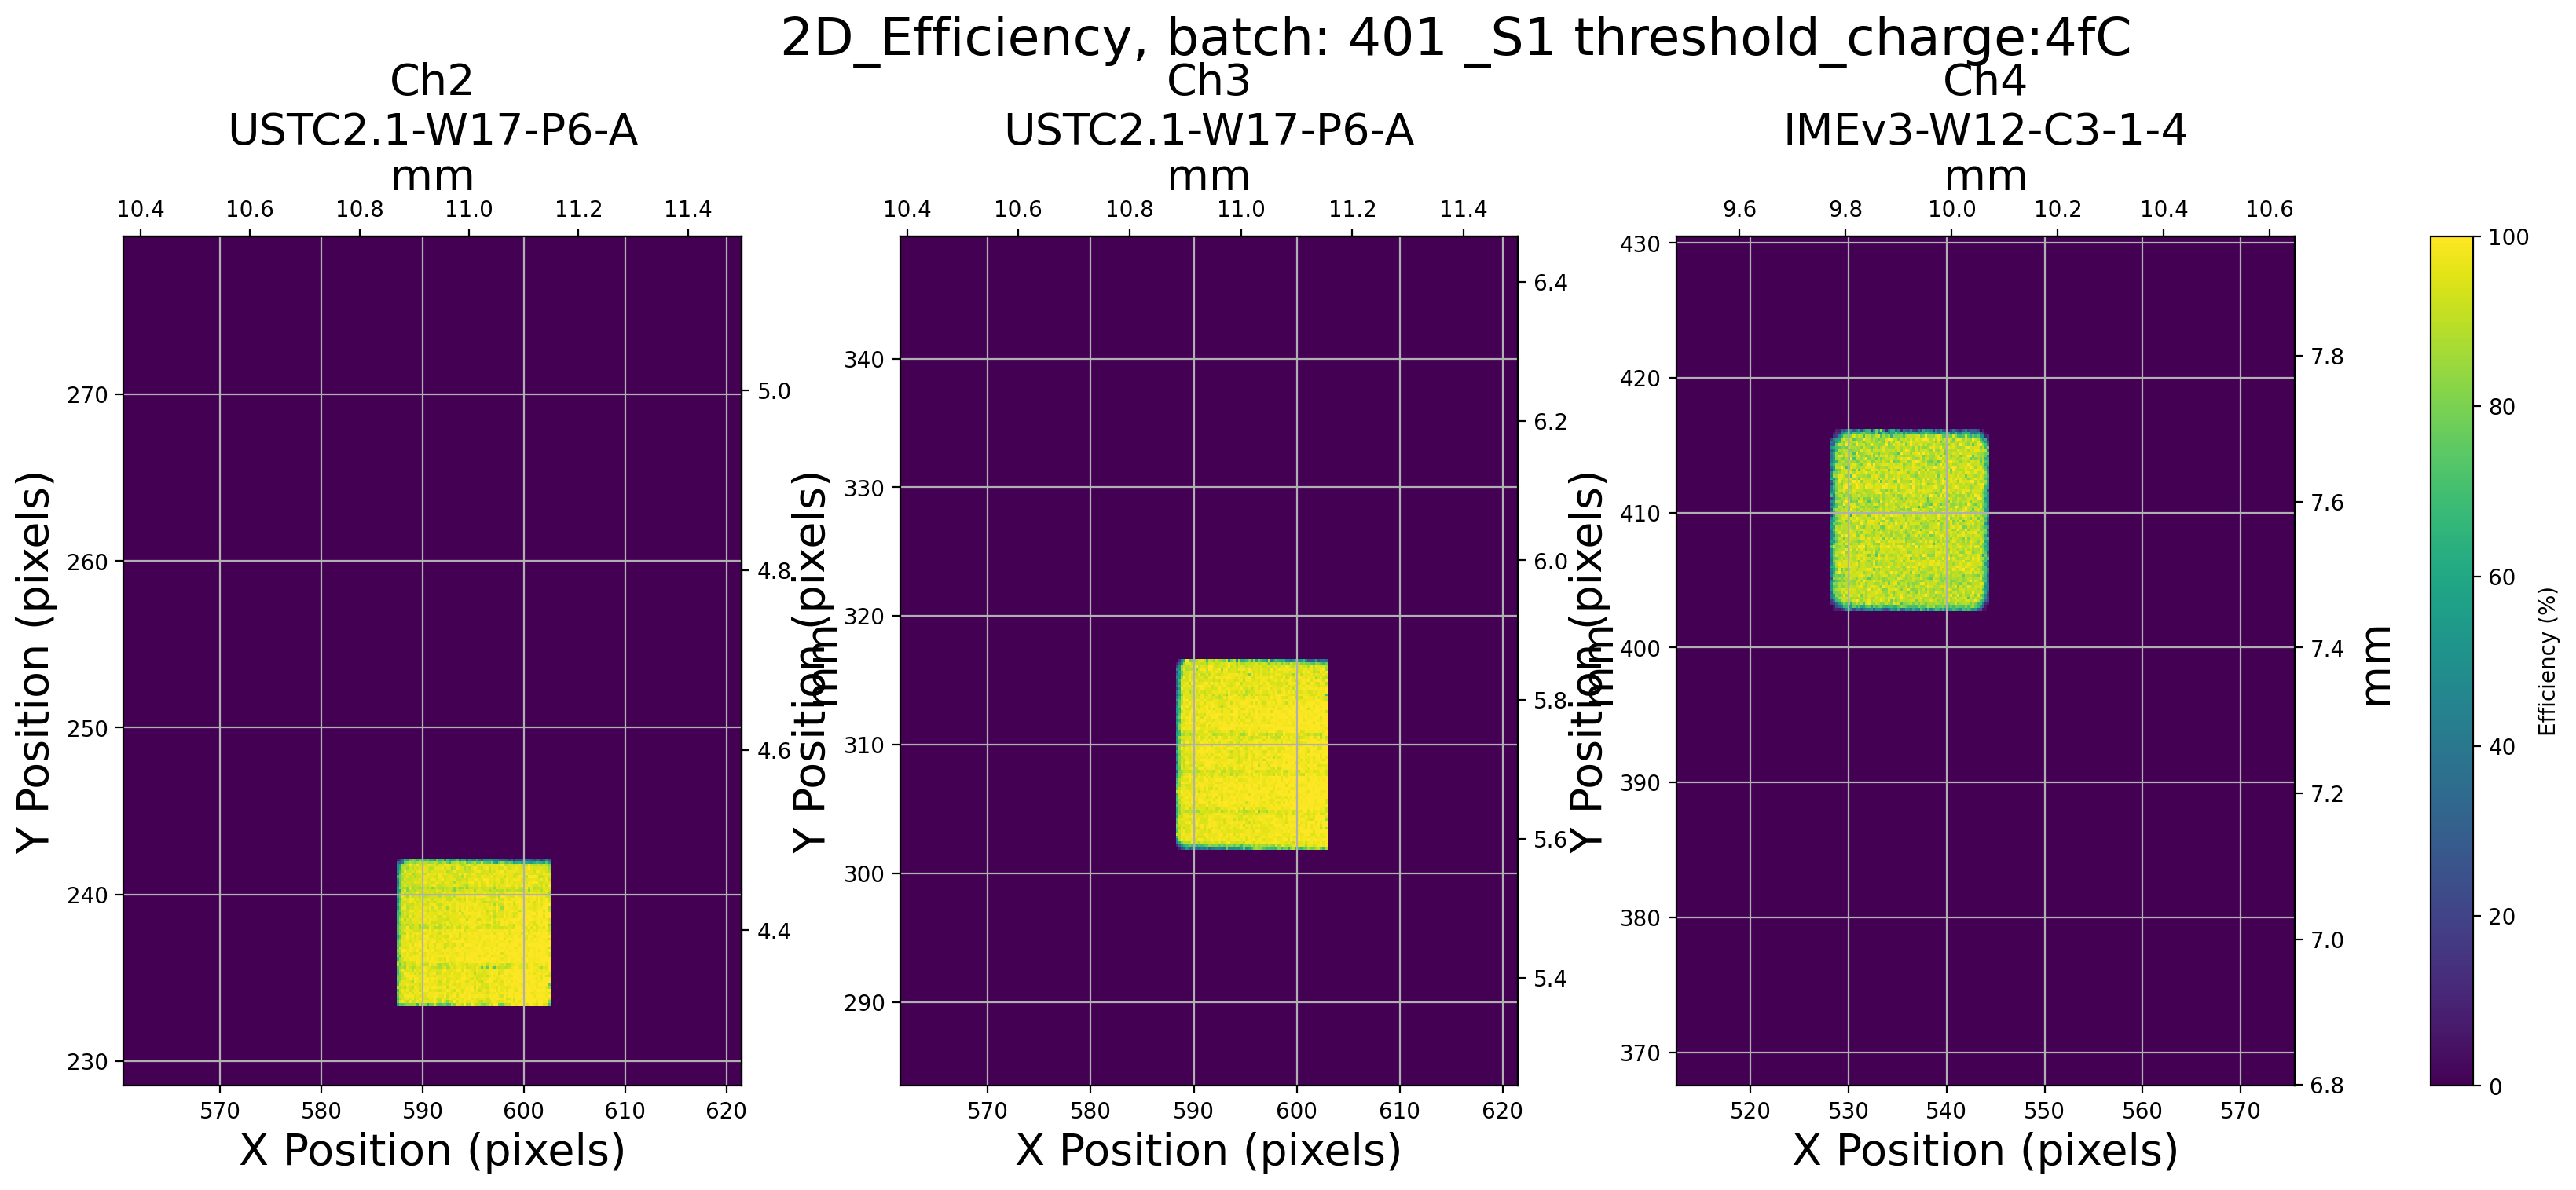

S2
MCP: 2500 V, angle: 0.0° temperature:-30.56°C


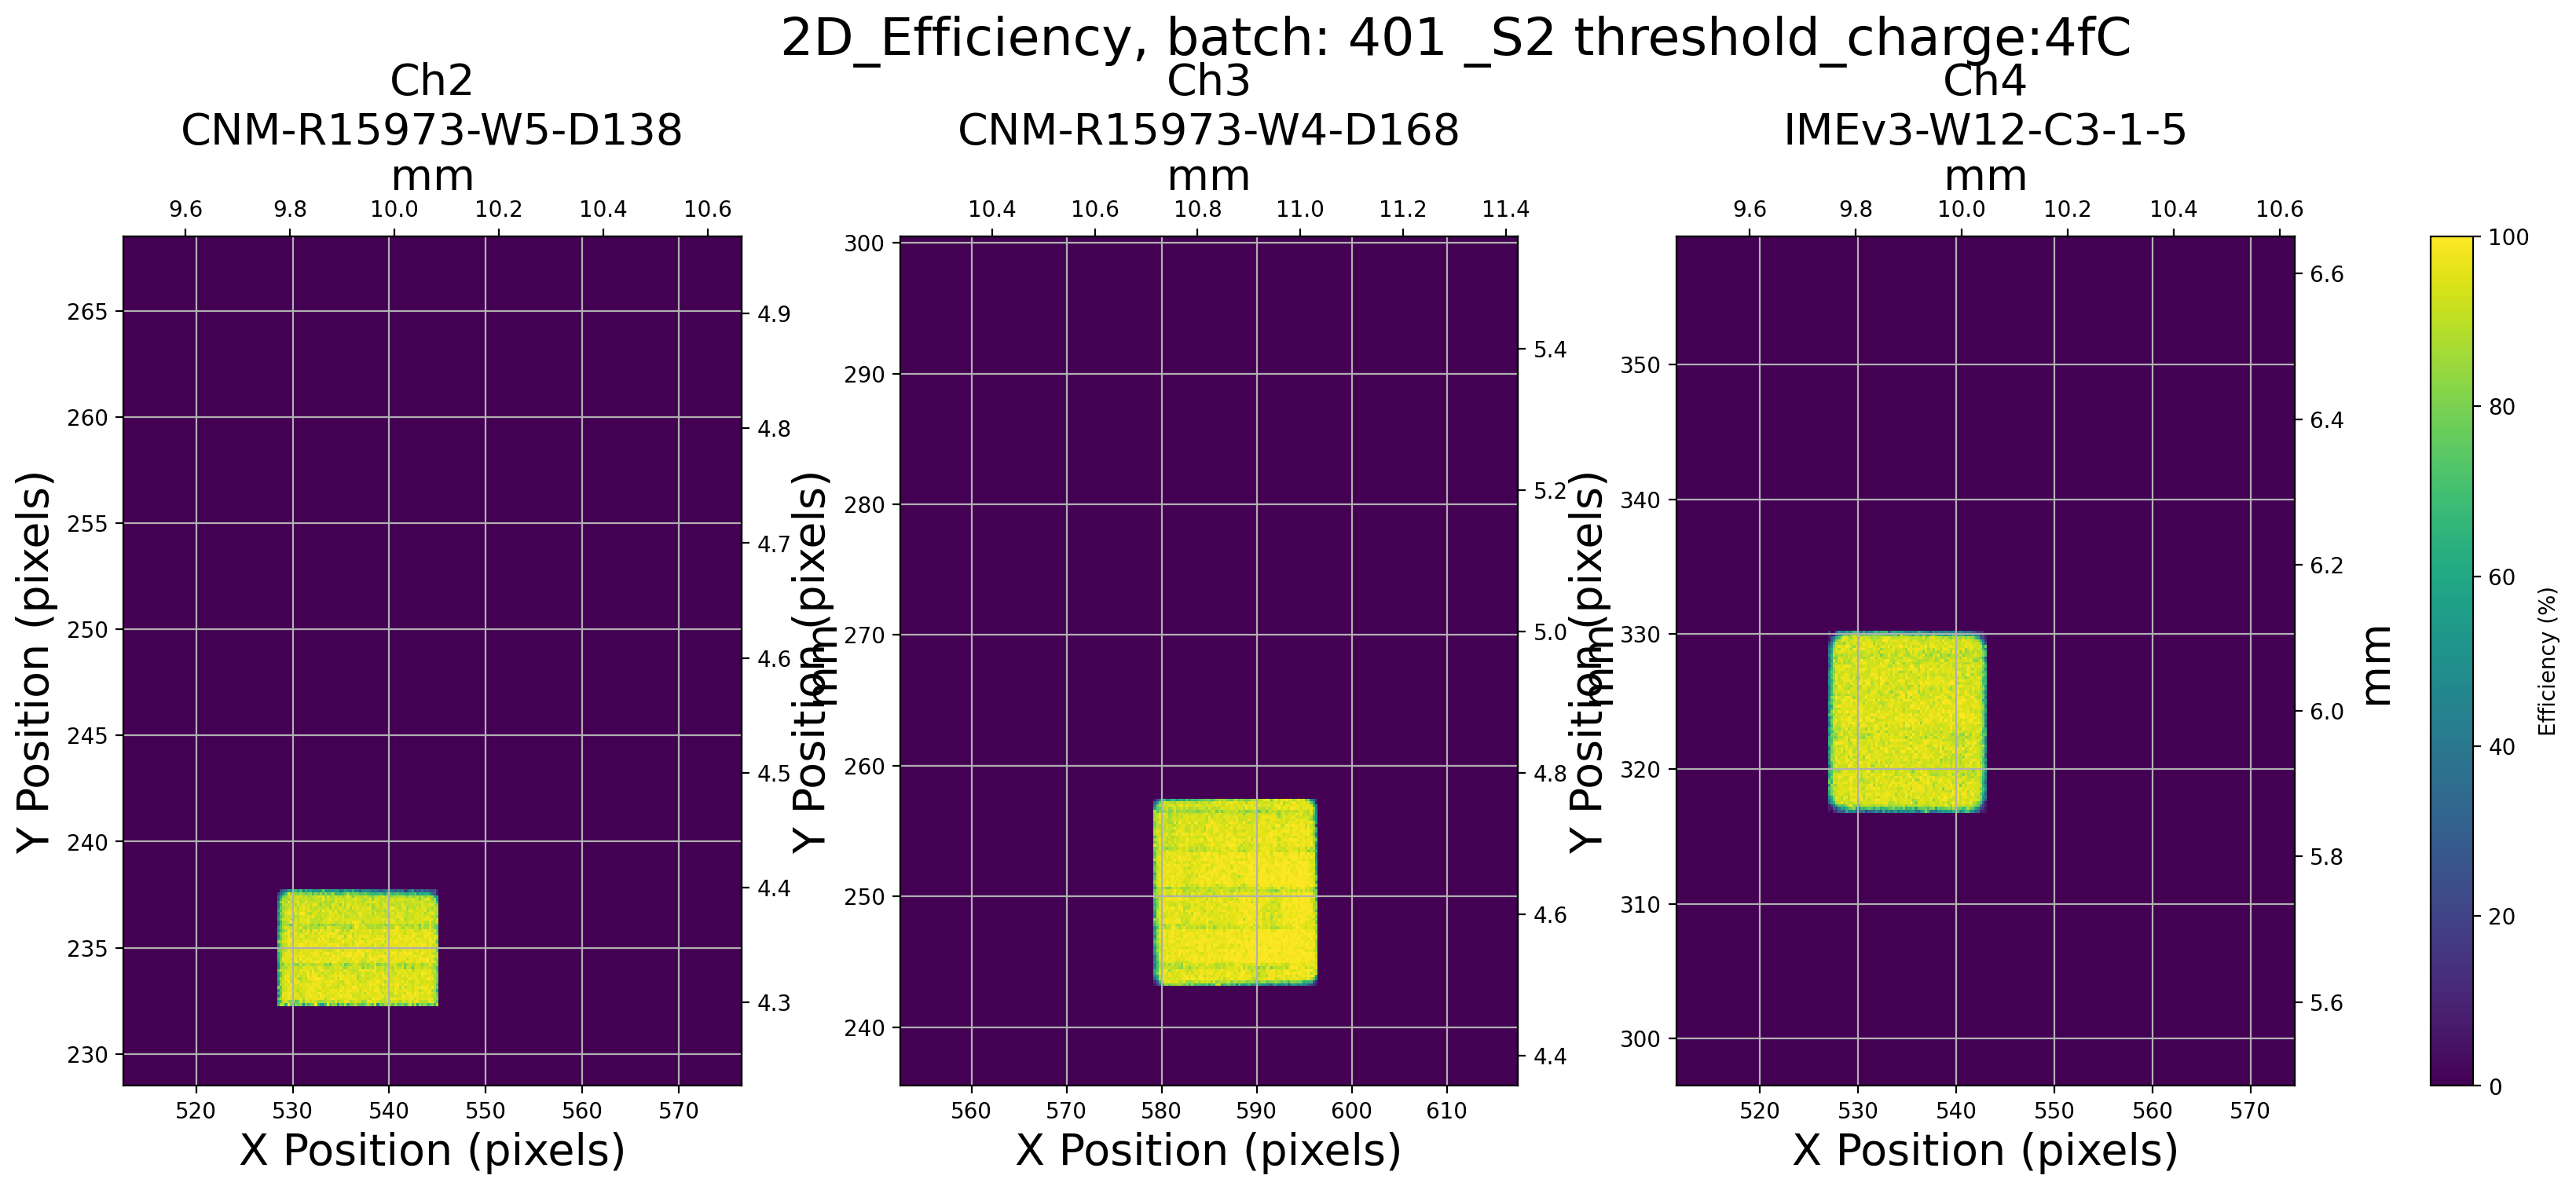

In [5]:
SAVE = False

threshold_charge = 4 #fC
DUTs = [1,2,3]

print("Batch: ", this_batch)
dir_path = {} 
df = {}  # dictionary containing the two dataframes of the two oscilloscopes
binning_method = 'rice'
for S in ["S1","S2"]: # the two scopes
    print(S)
    df[S] = load_batch(this_batch,S)
    print(f'MCP: {dict_of_batches[this_batch].S[S].channels["Ch1"].voltage} V, angle: {dict_of_batches[this_batch].angle}°', 'temperature:%.2f°C'%dict_of_batches[this_batch].tempA)
    time_cut = [time_mask(df[S], i, bins=5000, plot=False)[0] for i in DUTs]
#     print(dict_of_batches[this_batch].S['S2'].channels['Ch2'].__dict__)
#     plot(df[S],"2D_Tracks", dict_of_batches[this_batch], S, bins=bins1,
#          n_DUT=DUTs, savefig=SAVE, savefig_details=f'_{S} (no cuts)', fmt='jpg')
    
#     plot(df[S], "2D_Sensors", dict_of_batches[this_batch], S, bins=bins1,
#          n_DUT=DUTs, savefig=SAVE, savefig_details=f'_{S}_pulseHeight_cut', fmt='jpg')
    
#     plot(df[S], "1D_Efficiency", dict_of_batches[this_batch], S, threshold_charge=threshold_charge, geometry_cut=True, only_select='XY', mask=time_cut,
#         bins=bins1, n_DUT=DUTs, savefig=SAVE, savefig_details=f'_{S} threshold_charge:{threshold_charge}fC')
    
#     plot(df[S], "2D_Efficiency", dict_of_batches[this_batch], S, threshold_charge=threshold_charge, geometry_cut=False,
#         bins=bins1, n_DUT=DUTs, savefig=SAVE, savefig_details=f'_{S} threshold_charge:{threshold_charge}fC')
    
    plot(df[S], "2D_Efficiency", dict_of_batches[this_batch], S, threshold_charge=threshold_charge, geometry_cut=True, only_select='normal', zoom_to_sensor=True,
        bins=bins1, n_DUT=DUTs, savefig=SAVE, savefig_details=f'_{S} threshold_charge:{threshold_charge}fC ')
    